# WeatherPy
----

<h2><b>Analysis</b></h2>
<ul>
    <li>Temperature seems to have a clear correlation with latitude, meaning the weather becomes warmer the closer you get to the equator (0 Deg. Latitude)</li> 
    <li>Cities in the southern hemisphere are warmer than the northern hemisphere</li>    
    <li>There seems to be no strong relationship between latitude and cloudiness meaning that on average there are is as much cloudiness in the southern hemisphere as there is in the northern hemisphere</li>        
    <li>There seems to be no strong relationship between latitude and wind speed, however cities in the southern hemisphere have a slightly larger overall average wind speed than northern hemisphere cities</li>    
    <li>There seems to be no strong relationship between latitude and humidity, however northern hemisphere cities tend to be slightly more humid than southern hemisphere cities</li>
</ul>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
cities, countries

(['kapaa',
  'mataura',
  'coihaique',
  'porto santo',
  'albany',
  'illoqqortoormiut',
  'ushuaia',
  'hobart',
  'ostrovnoy',
  'cap malheureux',
  'kruisfontein',
  'bredasdorp',
  'taolanaro',
  'bilibino',
  'jalu',
  'chagda',
  'richards bay',
  'pascagoula',
  'vaini',
  'newport',
  'meulaboh',
  'houma',
  'nouadhibou',
  'kefalos',
  'rikitea',
  'ponta do sol',
  'new norfolk',
  'amderma',
  'nokaneng',
  'airai',
  'leningradskiy',
  'batsfjord',
  'victoria',
  'faanui',
  'butaritari',
  'tsihombe',
  'castro',
  'cabo san lucas',
  'port elizabeth',
  'saint anthony',
  'havoysund',
  'saint-pierre',
  'manyana',
  'kakamega',
  'kavaratti',
  'kaeo',
  'atuona',
  'jinchang',
  'cherskiy',
  'fortuna',
  'haines junction',
  'bluff',
  'busselton',
  'zheleznodorozhnyy',
  'zile',
  'upernavik',
  'bengkulu',
  'port alfred',
  'barentsburg',
  'elliot lake',
  'ilulissat',
  'dawei',
  'los llanos de aridane',
  'kapoeta',
  'lompoc',
  'tumannyy',
  'punta arenas'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Assign the url and create the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
unitF = "imperial"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unitF

#Obtain weather data 
weather_response = requests.get(query_url)
weather_json = weather_response.json()

#Display a sample of the data to see how it's comprised
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -114.35,
        "lat": 62.46
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -24.45,
        "feels_like": -35.99,
        "temp_min": -25.6,
        "temp_max": -23.01,
        "pressure": 1008,
        "humidity": 74
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.05,
        "deg": 350
    },
    "clouds": {
        "all": 20
    },
    "dt": 1609820050,
    "sys": {
        "type": 1,
        "id": 1007,
        "country": "CA",
        "sunrise": 1609779758,
        "sunset": 1609798925
    },
    "timezone": -25200,
    "id": 6185377,
    "name": "Yellowknife",
    "cod": 200
}


In [4]:
print(requests.get(query_url))

<Response [200]>


In [5]:
# set lists for the dataframe
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
clouds = []
wind_speed = []

# set initial count quantities for each city
counter = 0
set_of = 1

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------
''')

url = "http://api.openweathermap.org/data/2.5/weather?"
unitF = "imperial"

for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unitF
    
    # Exception Handling
    try:        
        response = requests.get(query_url).json()
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
                       
        if counter > 48:
            counter = 1
            set_of += 1
            city_name.append(city)
        else:
            counter += 1
            city_name.append(city)
        print(f"Processing Record {counter} of Set {set_of} | {city}")
        
        #time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    
    continue
    

print('''
-----------------------------
Data Retrival Complete
-----------------------------
''')

city_weather = {"City": city_name, 
                "Country": country, 
                "Date": date, 
                "Latitude": latitude, 
                "Longitude": longitude,
                "Max Temperature": max_temperature, 
                "Humidity": humidity,
                "Cloudiness": clouds, 
                "Wind Speed": wind_speed}


-----------------------------
Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | coihaique
Processing Record 4 of Set 1 | porto santo
Processing Record 5 of Set 1 | albany
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | ostrovnoy
Processing Record 9 of Set 1 | cap malheureux
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | jalu
City not found. Skipping...
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | pascagoula
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | newport
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | houma
Processing Record 20 of Set 1 | nouadhibou
Processing Re

Processing Record 43 of Set 4 | tekirdag
Processing Record 44 of Set 4 | dunmanway
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | khandyga
Processing Record 47 of Set 4 | kalmunai
City not found. Skipping...
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | nikolskoye
Processing Record 1 of Set 5 | rosetown
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | trairi
Processing Record 4 of Set 5 | rocha
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | cabedelo
Processing Record 7 of Set 5 | san andres
Processing Record 8 of Set 5 | ales
Processing Record 9 of Set 5 | tasiilaq
Processing Record 10 of Set 5 | krasnovishersk
Processing Record 11 of Set 5 | saldanha
Processing Record 12 of Set 5 | san borja
Processing Record 13 of Set 5 | port-gentil
Processing Record 14 of Set 5 | panlaitan
Processing Record 15 of Set 5 | luis correia
Processing Record 16 of Set 5 | sumbawanga
Processing Record 17 of

City not found. Skipping...
Processing Record 43 of Set 8 | fereydun kenar
Processing Record 44 of Set 8 | vostok
Processing Record 45 of Set 8 | le port
Processing Record 46 of Set 8 | korla
Processing Record 47 of Set 8 | maumere
Processing Record 48 of Set 8 | lincoln
Processing Record 49 of Set 8 | san carlos de bariloche
Processing Record 1 of Set 9 | ratnagiri
Processing Record 2 of Set 9 | chicama
Processing Record 3 of Set 9 | vung tau
Processing Record 4 of Set 9 | surt
Processing Record 5 of Set 9 | slave lake
Processing Record 6 of Set 9 | san benito
Processing Record 7 of Set 9 | sumbe
Processing Record 8 of Set 9 | salalah
Processing Record 9 of Set 9 | nhulunbuy
Processing Record 10 of Set 9 | trincomalee
Processing Record 11 of Set 9 | kodinsk
Processing Record 12 of Set 9 | culpeper
Processing Record 13 of Set 9 | vavoua
City not found. Skipping...
Processing Record 14 of Set 9 | ust-kuyga
Processing Record 15 of Set 9 | koppies
Processing Record 16 of Set 9 | inta
Proc

Processing Record 31 of Set 12 | grenada
Processing Record 32 of Set 12 | mehamn
Processing Record 33 of Set 12 | panguipulli
Processing Record 34 of Set 12 | quepos

-----------------------------
Data Retrival Complete
-----------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame



In [6]:
weather_data = pd.DataFrame(city_weather).sort_index(ascending=True)
pd.set_option('display.max_rows', 600)
weather_data

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,kapaa,US,1609820074,22.08,-159.32,75.20,78,40,10.29
1,mataura,NZ,1609819777,-46.19,168.86,58.37,87,100,0.89
2,coihaique,CL,1609819908,-45.58,-72.07,51.80,66,0,3.36
3,porto santo,PT,1609820074,33.07,-16.34,64.40,77,40,10.29
4,albany,US,1609819827,42.60,-73.97,34.00,87,97,2.48
5,ushuaia,AR,1609819818,-54.80,-68.30,51.80,53,75,3.36
6,hobart,AU,1609819926,-42.88,147.33,73.99,52,40,12.75
7,ostrovnoy,RU,1609820075,68.05,39.51,11.37,94,50,11.18
8,cap malheureux,MU,1609820075,-19.98,57.61,81.00,73,10,5.99
9,kruisfontein,ZA,1609819812,-34.00,24.73,71.01,95,98,4.00


In [7]:
# output data to csv
weather_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity >= 100%.
----
Skip this step if there are no cities that have humidity >= 100%. 

In [8]:
weather_data.describe()

,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.730000e+02,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,1.609820e+09,19.780035,19.691675,50.387452,76.394415,58.394415,7.921640
std,8.750394e+01,33.221450,89.290643,31.498627,18.904196,38.207038,5.710316
min,1.609819e+09,-54.800000,-179.170000,-47.510000,1.000000,0.000000,0.110000
25%,1.609820e+09,-8.620000,-59.140000,32.000000,69.000000,20.000000,3.830000
50%,1.609820e+09,22.290000,25.570000,59.610000,81.000000,75.000000,6.510000
75%,1.609820e+09,47.370000,92.310000,75.200000,90.000000,94.000000,10.650000
max,1.609820e+09,78.220000,179.320000,96.800000,100.000000,100.000000,46.080000


In [9]:
#  Get the indices of cities that have humidity >= 100%.
high_humidity = weather_data.loc[weather_data['Humidity']>=100, :]
high_humidity

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
18,houma,US,1609820075,29.60,-90.72,57.00,100,1,5.61
33,port elizabeth,ZA,1609820076,-33.92,25.57,71.60,100,75,8.05
44,fortuna,US,1609820077,40.60,-124.16,45.00,100,90,5.82
48,zheleznodorozhnyy,RU,1609820077,55.75,38.00,28.40,100,90,4.47
78,palmer,US,1609820079,42.16,-72.33,28.99,100,90,3.09
92,jamestown,US,1609820080,42.10,-79.24,32.00,100,90,3.36
100,cayenne,GF,1609820080,4.93,-52.33,75.20,100,0,9.19
116,salamanca,ES,1609820081,40.83,-6.00,26.01,100,90,2.04
134,havelock,US,1609819842,34.88,-76.90,42.01,100,1,2.21
184,bartica,GY,1609820084,6.40,-58.62,73.40,100,40,4.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

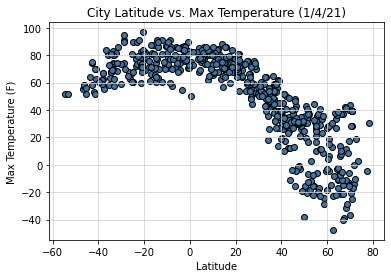

In [10]:
plt.scatter(weather_data["Latitude"],weather_data["Max Temperature"],edgecolors="black",facecolors="#3f74a3")
plt.title("City Latitude vs. Max Temperature (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

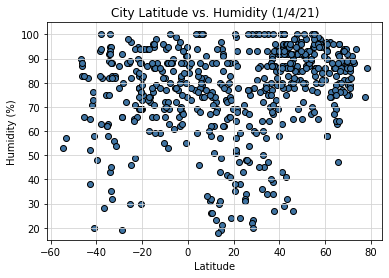

In [11]:
plt.scatter(weather_data["Latitude"],weather_data["Humidity"],edgecolors="black",facecolors="#3f74a3")
plt.title("City Latitude vs. Humidity (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

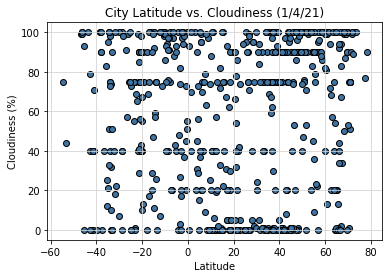

In [12]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudiness"],edgecolors="black",facecolors="#3f74a3")
plt.title("City Latitude vs. Cloudiness (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

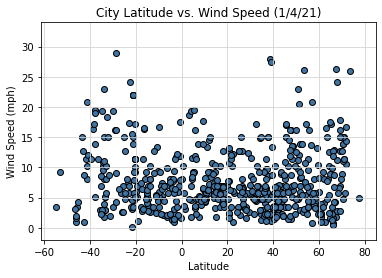

In [13]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed"],edgecolors="black",facecolors="#3f74a3")
plt.title("City Latitude vs. Wind Speed (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [14]:
northHem_maxTemp = weather_data.loc[weather_data["Latitude"]>0, :]
southHem_minTemp = weather_data.loc[weather_data["Latitude"]<0, :]
southHem_minTemp

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
1,mataura,NZ,1609819777,-46.19,168.86,58.37,87,100,0.89
2,coihaique,CL,1609819908,-45.58,-72.07,51.80,66,0,3.36
5,ushuaia,AR,1609819818,-54.80,-68.30,51.80,53,75,3.36
6,hobart,AU,1609819926,-42.88,147.33,73.99,52,40,12.75
8,cap malheureux,MU,1609820075,-19.98,57.61,81.00,73,10,5.99
9,kruisfontein,ZA,1609819812,-34.00,24.73,71.01,95,98,4.00
10,bredasdorp,ZA,1609820075,-34.53,20.04,68.00,82,100,10.29
13,richards bay,ZA,1609820075,-28.78,32.04,74.05,92,100,9.06
15,vaini,TO,1609819822,-21.20,-175.20,82.40,83,75,13.87
21,rikitea,PF,1609819786,-23.12,-134.97,77.07,71,1,17.31


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.77


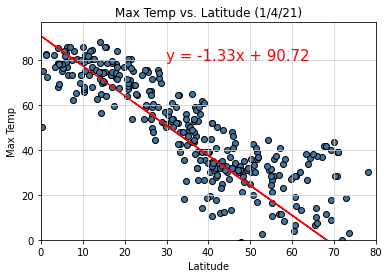

In [16]:
import scipy.stats as st
x_values = northHem_maxTemp["Latitude"]
y_values = northHem_maxTemp["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem_maxTemp["Latitude"],northHem_maxTemp["Max Temperature"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(0, 80)
plt.ylim(0, max(max_temperature))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,80),fontsize=15,color="red")
plt.title("Max Temp vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,max_temperature)[0],2)}")
#print(f"The r-value is {round({rvalue},2)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.77


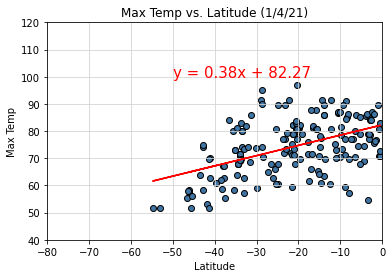

In [17]:
import scipy.stats as st
x_values = southHem_minTemp["Latitude"]
y_values = southHem_minTemp["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southHem_minTemp["Latitude"],southHem_minTemp["Max Temperature"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(-80, 0)
plt.ylim(40, 120)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.title("Max Temp vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,max_temperature)[0],2)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.18


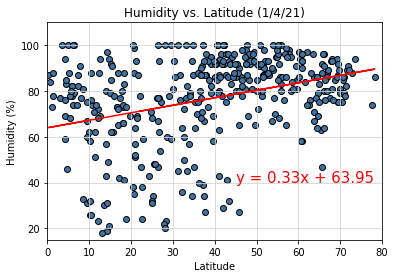

In [21]:
import scipy.stats as st
x_values = northHem_maxTemp["Latitude"]
y_values = northHem_maxTemp["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem_maxTemp["Latitude"],northHem_maxTemp["Humidity"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(0, 80)
plt.ylim(15, 110)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.title("Humidity vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,humidity)[0],2)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.18


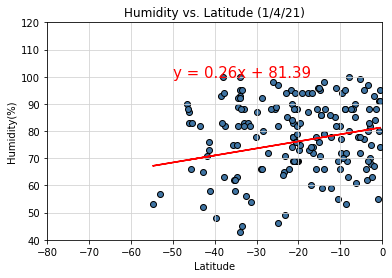

In [22]:
import scipy.stats as st
x_values = southHem_minTemp["Latitude"]
y_values = southHem_minTemp["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southHem_minTemp["Latitude"],southHem_minTemp["Humidity"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(-80, 0)
plt.ylim(40, 120)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.title("Humidity vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,humidity)[0],2)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.08


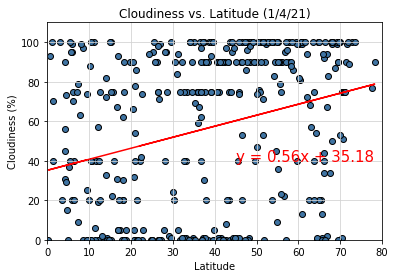

In [24]:
import scipy.stats as st
x_values = northHem_maxTemp["Latitude"]
y_values = northHem_maxTemp["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem_maxTemp["Latitude"],northHem_maxTemp["Cloudiness"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(0, 80)
plt.ylim(0, 110)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,clouds)[0],2)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.08


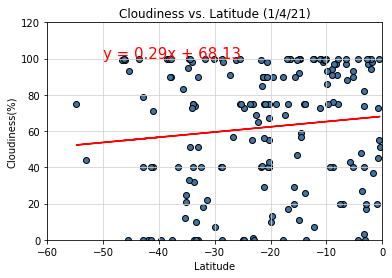

In [25]:
import scipy.stats as st
x_values = southHem_minTemp["Latitude"]
y_values = southHem_minTemp["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southHem_minTemp["Latitude"],southHem_minTemp["Cloudiness"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(-60, 0)
plt.ylim(0, 120)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,clouds)[0],2)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.01


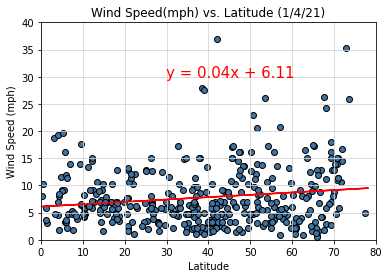

In [27]:
import scipy.stats as st
x_values = northHem_maxTemp["Latitude"]
y_values = northHem_maxTemp["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northHem_maxTemp["Latitude"],northHem_maxTemp["Wind Speed"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(0, 80)
plt.ylim(0, 40)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 30),fontsize=15,color="red")
plt.title("Wind Speed(mph) vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,wind_speed)[0],2)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.01


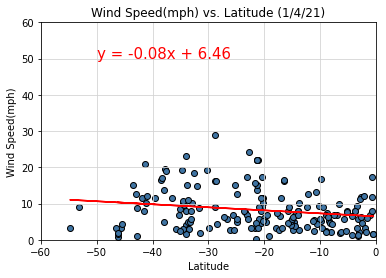

In [28]:
import scipy.stats as st
x_values = southHem_minTemp["Latitude"]
y_values = southHem_minTemp["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southHem_minTemp["Latitude"],southHem_minTemp["Wind Speed"],edgecolors="black",facecolors="#3f74a3")
plt.xlim(-60, 0)
plt.ylim(0, 60)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.title("Wind Speed(mph) vs. Latitude (1/4/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f"The r-value is {round(st.pearsonr(latitude,wind_speed)[0],2)}")
plt.show()